In [363]:
#Installing Libraries
from google.cloud import aiplatform, storage
from PIL import Image
import os
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'big-data-mgmt-project-369123-2e5756e0f41e.json'

# Setting up environtment and creating bucket

In [364]:
storage_client = storage.Client()

In [365]:
bucket_name = 'bigdatamgmtproject'
# bucket = storage.Bucket(storage_client, bucket_name)

In [366]:
bucket = storage_client.create_bucket(bucket_name, location = 'US')

Conflict: 409 POST https://storage.googleapis.com/storage/v1/b?project=big-data-mgmt-project-369123&prettyPrint=false: Your previous request to create the named bucket succeeded and you already own it.

In [367]:
blob = bucket.blob('sample.png')

In [368]:
with blob.open("w") as f:
    f.write(Image.open('sample.png'))

TypeError: write() argument must be str, not PngImageFile

In [369]:
blob.upload_from_filename('sample.png')

In [31]:
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 23.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.1/757.1 kB 53.1 MB/s eta 0:00:00


In [370]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [371]:
# Extracting the zip file from the file pulled from the Git Repository
# The zip file was used as the data was too large to be uploaded to GitHub
from zipfile import ZipFile
# specifying the zip file name
file_name = "airbnb-New-York/airbnb_nyc_data_zipped.zip"
  
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
  
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

File Name                                             Modified             Size
Airbnb_Open_Data.csv                           2022-08-01 15:58:24     35913454
Extracting all the files now...
Done!


In [372]:
# Install Spark NLP from PyPI
!pip install -q spark-nlp==4.0.1 pyspark==3.3.0

#no need to set the environment path

import sparknlp
#all other imports

import pandas as pd

spark=sparknlp.start() 

print("Spark NLP version: ", sparknlp.version())
print("Apache Spark version: ", spark.version)

spark

22/11/22 00:00:42 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.
Spark NLP version:  4.0.1
Apache Spark version:  3.3.0


In [373]:
from pyspark.sql import SparkSession
#spark1 = SparkSession.builder.appName('Ops').getOrCreate()
df = spark1.read.csv('Airbnb_Open_Data.csv')


# Data Exploration

In [374]:
df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)
 |-- _c12: string (nullable = true)
 |-- _c13: string (nullable = true)
 |-- _c14: string (nullable = true)
 |-- _c15: string (nullable = true)
 |-- _c16: string (nullable = true)
 |-- _c17: string (nullable = true)
 |-- _c18: string (nullable = true)
 |-- _c19: string (nullable = true)
 |-- _c20: string (nullable = true)
 |-- _c21: string (nullable = true)
 |-- _c22: string (nullable = true)
 |-- _c23: string (nullable = true)
 |-- _c24: string (nullable = true)
 |-- _c25: string (nullable = true)



In [375]:
df.show(5)

+-------+--------------------+-----------+--------------------+---------+-------------------+-------------+--------+---------+-------------+------------+----------------+-------------------+---------------+-----------------+-----+-----------+--------------+-----------------+-----------+-----------------+------------------+--------------------+----------------+--------------------+-------+
|    _c0|                 _c1|        _c2|                 _c3|      _c4|                _c5|          _c6|     _c7|      _c8|          _c9|        _c10|            _c11|               _c12|           _c13|             _c14| _c15|       _c16|          _c17|             _c18|       _c19|             _c20|              _c21|                _c22|            _c23|                _c24|   _c25|
+-------+--------------------+-----------+--------------------+---------+-------------------+-------------+--------+---------+-------------+------------+----------------+-------------------+---------------+----------

### Importing Libraries and setting up necessary parameters for styling/warnings

In [376]:
# data
import pandas as pd
import numpy as np

# visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno as msno

# styling
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.facecolor'] = '#00000000'
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.facecolor'] = '#00000000'

import os
from wordcloud import WordCloud

# nltk
import nltk

import warnings
warnings.filterwarnings("ignore")

In [377]:
#Reading the dataset from the extracted .csv file
df = pd.read_csv("Airbnb_Open_Data.csv")

In [378]:
#Taking an overlook of the dataset
df.head()

id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service fee minimum nights  \
0  40.64749 -73.97237  United States  ...       $193            10.0   
1  40.75362 -73.98377  United States  ...        $28            30.0   
2  40.80902 -73.94190  United States  ...       $124             3.0   
3  40.68514 -73.95976  United States  ...        $74            30.0   
4  40.79851 -73.94399  United States  ...        $41            10.0   

  number of reviews last review  reviews per month review rate number  \
0               9.0  10/19/2021               0.21                4.0   
1              45.0   5/21/2022               0.38                4.0   
2               0.0         NaN                NaN                5.0   
3             270.0    7/5/2019               4.64                4.0   
4               9.0  11/19/2018               0.10                3.0   

  calculated host listings count  availability 365  \
0                            6.0             286.0   
1                            2.0             228.0   
2                            1.0             352.0   
3                            1.0             322.0   
4                            1.0             289.0   

                                         house_rules license  
0  Clean up and treat the home the way you'd like...     NaN  
1  Pet friendly but please confirm with me if the...     NaN  
2  I encourage you to use my kitchen, cooking and...     NaN  
3                                                NaN     NaN  
4  Please no smoking in the house, porch or on th...     NaN  

[5 rows x 26 columns]

From looking at the data above we can observe the columns and the data types for each of these columns. We also see that there are some NaN values that should be either modified or removed completely.

In [379]:
#Checking the number of columns and rows 
df.shape

(102599, 26)

There are 102,599 rows and 26 columns for our dataset

In [380]:
#Listing the columns
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [381]:
#Getting more info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

There are a number of null cells which need to be worked.

In [382]:
#Getting more statistics about each of the columns
df.describe()

id       host id            lat           long  \
count  1.025990e+05  1.025990e+05  102591.000000  102591.000000   
mean   2.914623e+07  4.925411e+10      40.728094     -73.949644   
std    1.625751e+07  2.853900e+10       0.055857       0.049521   
min    1.001254e+06  1.236005e+08      40.499790     -74.249840   
25%    1.508581e+07  2.458333e+10      40.688740     -73.982580   
50%    2.913660e+07  4.911774e+10      40.722290     -73.954440   
75%    4.320120e+07  7.399650e+10      40.762760     -73.932350   
max    5.736742e+07  9.876313e+10      40.916970     -73.705220   

       Construction year  minimum nights  number of reviews  \
count      102385.000000   102190.000000      102416.000000   
mean         2012.487464        8.135845          27.483743   
std             5.765556       30.553781          49.508954   
min          2003.000000    -1223.000000           0.000000   
25%          2007.000000        2.000000           1.000000   
50%          2012.000000        3.000000           7.000000   
75%          2017.000000        5.000000          30.000000   
max          2022.000000     5645.000000        1024.000000   

       reviews per month  review rate number  calculated host listings count  \
count       86720.000000       102273.000000                   102280.000000   
mean            1.374022            3.279106                        7.936605   
std             1.746621            1.284657                       32.218780   
min             0.010000            1.000000                        1.000000   
25%             0.220000            2.000000                        1.000000   
50%             0.740000            3.000000                        1.000000   
75%             2.000000            4.000000                        2.000000   
max            90.000000            5.000000                      332.000000   

       availability 365  
count     102151.000000  
mean         141.133254  
std          135.435024  
min          -10.000000  
25%            3.000000  
50%           96.000000  
75%          269.000000  
max         3677.000000

# Data Cleaning

In [383]:
#Calculating the number of null objects in each of the columns
df.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [384]:
#Calculating the percentage of NA values for each of the columns
percentage_result = df.isnull().sum()/df.shape[0] * 100
# create a DataFrame to show case the result
percentage_result = pd.DataFrame({"columns": percentage_result.keys(), "% missing": percentage_result})
percentage_result.reset_index(drop=True, inplace=True)
percentage_result

columns  % missing
0                               id   0.000000
1                             NAME   0.243667
2                          host id   0.000000
3           host_identity_verified   0.281679
4                        host name   0.395715
5              neighbourhood group   0.028265
6                    neighbourhood   0.015595
7                              lat   0.007797
8                             long   0.007797
9                          country   0.518524
10                    country code   0.127682
11                instant_bookable   0.102340
12             cancellation_policy   0.074075
13                       room type   0.000000
14               Construction year   0.208579
15                           price   0.240743
16                     service fee   0.266084
17                  minimum nights   0.398639
18               number of reviews   0.178364
19                     last review  15.490404
20               reviews per month  15.476759
21              review rate number   0.317742
22  calculated host listings count   0.310919
23                availability 365   0.436651
24                     house_rules  50.810437
25                         license  99.998051

From the above table 'house_rules' and 'license' columns have a high percentage of NaN values. Thus they are dropped.

In [385]:
df.drop(columns=["house_rules","license"], axis=1, inplace=True)

#### As 'host_id' and 'id' are two columns that are unique for each of the rows we can drop it. Also country and country code can be dropped as the data contains only airbnbs in US.

In [386]:
df.drop(columns=["id","host id","country","country code"],axis=1,inplace=True)
df

NAME  \
0                     Clean & quiet apt home by the park   
1                                  Skylit Midtown Castle   
2                    THE VILLAGE OF HARLEM....NEW YORK !   
3                                                    NaN   
4       Entire Apt: Spacious Studio/Loft by central park   
...                                                  ...   
102594                        Spare room in Williamsburg   
102595                     Best Location near Columbia U   
102596                    Comfy, bright room in Brooklyn   
102597                  Big Studio-One Stop from Midtown   
102598                              585 sf Luxury Studio   

       host_identity_verified    host name neighbourhood group  \
0                 unconfirmed     Madaline            Brooklyn   
1                    verified        Jenna           Manhattan   
2                         NaN        Elise           Manhattan   
3                 unconfirmed        Garry            Brooklyn   
4                    verified       Lyndon           Manhattan   
...                       ...          ...                 ...   
102594               verified         Krik            Brooklyn   
102595            unconfirmed        Mifan           Manhattan   
102596            unconfirmed        Megan            Brooklyn   
102597            unconfirmed  Christopher              Queens   
102598            unconfirmed      Rebecca           Manhattan   

              neighbourhood       lat      long instant_bookable  \
0                Kensington  40.64749 -73.97237            False   
1                   Midtown  40.75362 -73.98377            False   
2                    Harlem  40.80902 -73.94190             True   
3              Clinton Hill  40.68514 -73.95976             True   
4               East Harlem  40.79851 -73.94399            False   
...                     ...       ...       ...              ...   
102594         Williamsburg  40.70862 -73.94651            False   
102595  Morningside Heights  40.80460 -73.96545             True   
102596           Park Slope  40.67505 -73.98045             True   
102597     Long Island City  40.74989 -73.93777             True   
102598      Upper West Side  40.76807 -73.98342            False   

       cancellation_policy        room type  Construction year    price  \
0                   strict     Private room             2020.0    $966    
1                 moderate  Entire home/apt             2007.0    $142    
2                 flexible     Private room             2005.0    $620    
3                 moderate  Entire home/apt             2005.0    $368    
4                 moderate  Entire home/apt             2009.0    $204    
...                    ...              ...                ...      ...   
102594            flexible     Private room             2003.0    $844    
102595            moderate     Private room             2016.0    $837    
102596            moderate     Private room             2009.0    $988    
102597              strict  Entire home/apt             2015.0    $546    
102598            flexible  Entire home/apt             2010.0  $1,032    

       service fee  minimum nights  number of reviews last review  \
0            $193             10.0                9.0  10/19/2021   
1             $28             30.0               45.0   5/21/2022   
2            $124              3.0                0.0         NaN   
3             $74             30.0              270.0    7/5/2019   
4             $41             10.0                9.0  11/19/2018   
...            ...             ...                ...         ...   
102594       $169              1.0                0.0         NaN   
102595       $167              1.0                1.0    7/6/2015   
102596       $198              3.0                0.0         NaN   
102597       $109              2.0                5.0  10/11/2015   
102598       $206              1.0                0.0        

Removing '$' signs from dataset to convert to float64 

In [387]:
def remove_dollar_sign(value):
    if pd.isna(value):
        return np.NaN
    else:
        return float(value.replace("$","").replace(",","").replace(" ",""))
df["price"]=df["price"].apply(lambda x: remove_dollar_sign(x))
df["price"]
df["service fee"]=df["service fee"].apply(lambda x: remove_dollar_sign(x))
df["service fee"]


0         193.0
1          28.0
2         124.0
3          74.0
4          41.0
          ...  
102594    169.0
102595    167.0
102596    198.0
102597    109.0
102598    206.0
Name: service fee, Length: 102599, dtype: float64

### Converting the last review column to date time format for analyzing

In [388]:
df["last review"]=pd.to_datetime(df["last review"])

### Reviewing the data after data processing

In [389]:
df.head() 

NAME host_identity_verified  \
0                Clean & quiet apt home by the park            unconfirmed   
1                             Skylit Midtown Castle               verified   
2               THE VILLAGE OF HARLEM....NEW YORK !                    NaN   
3                                               NaN            unconfirmed   
4  Entire Apt: Spacious Studio/Loft by central park               verified   

  host name neighbourhood group neighbourhood       lat      long  \
0  Madaline            Brooklyn    Kensington  40.64749 -73.97237   
1     Jenna           Manhattan       Midtown  40.75362 -73.98377   
2     Elise           Manhattan        Harlem  40.80902 -73.94190   
3     Garry            Brooklyn  Clinton Hill  40.68514 -73.95976   
4    Lyndon           Manhattan   East Harlem  40.79851 -73.94399   

  instant_bookable cancellation_policy        room type  Construction year  \
0            False              strict     Private room             2020.0   
1            False            moderate  Entire home/apt             2007.0   
2             True            flexible     Private room             2005.0   
3             True            moderate  Entire home/apt             2005.0   
4            False            moderate  Entire home/apt             2009.0   

   price  service fee  minimum nights  number of reviews last review  \
0  966.0        193.0            10.0                9.0  2021-10-19   
1  142.0         28.0            30.0               45.0  2022-05-21   
2  620.0        124.0             3.0                0.0         NaT   
3  368.0         74.0            30.0              270.0  2019-07-05   
4  204.0         41.0            10.0                9.0  2018-11-19   

   reviews per month  review rate number  calculated host listings count  \
0               0.21                 4.0                             6.0   
1               0.38                 4.0                             2.0   
2                NaN                 5.0                             1.0   
3               4.64                 4.0                             1.0   
4               0.10                 3.0                             1.0   

   availability 365  
0             286.0  
1             228.0  
2             352.0  
3             322.0  
4             289.0

In [390]:
df.dtypes

NAME                                      object
host_identity_verified                    object
host name                                 object
neighbourhood group                       object
neighbourhood                             object
lat                                      float64
long                                     float64
instant_bookable                          object
cancellation_policy                       object
room type                                 object
Construction year                        float64
price                                    float64
service fee                              float64
minimum nights                           float64
number of reviews                        float64
last review                       datetime64[ns]
reviews per month                        float64
review rate number                       float64
calculated host listings count           float64
availability 365                         float64
dtype: object

# Data Visualization

### Using PySpark for multiprocessing of data

In [391]:
#sparkdf =spark.createDataFrame(df)
spark.conf.set("spark.sql.execution.arrow.enabled","true")
sparkDF=spark.createDataFrame(df) 

22/11/22 00:00:50 WARN SQLConf: The SQL config 'spark.sql.execution.arrow.enabled' has been deprecated in Spark v3.0 and may be removed in the future. Use 'spark.sql.execution.arrow.pyspark.enabled' instead of it.


In [392]:
df1 = sparkDF.select("Construction year")

In [393]:
df1 = df1.toPandas()

22/11/22 00:00:50 WARN TaskSetManager: Stage 106 contains a task of very large size (11085 KiB). The maximum recommended task size is 1000 KiB.


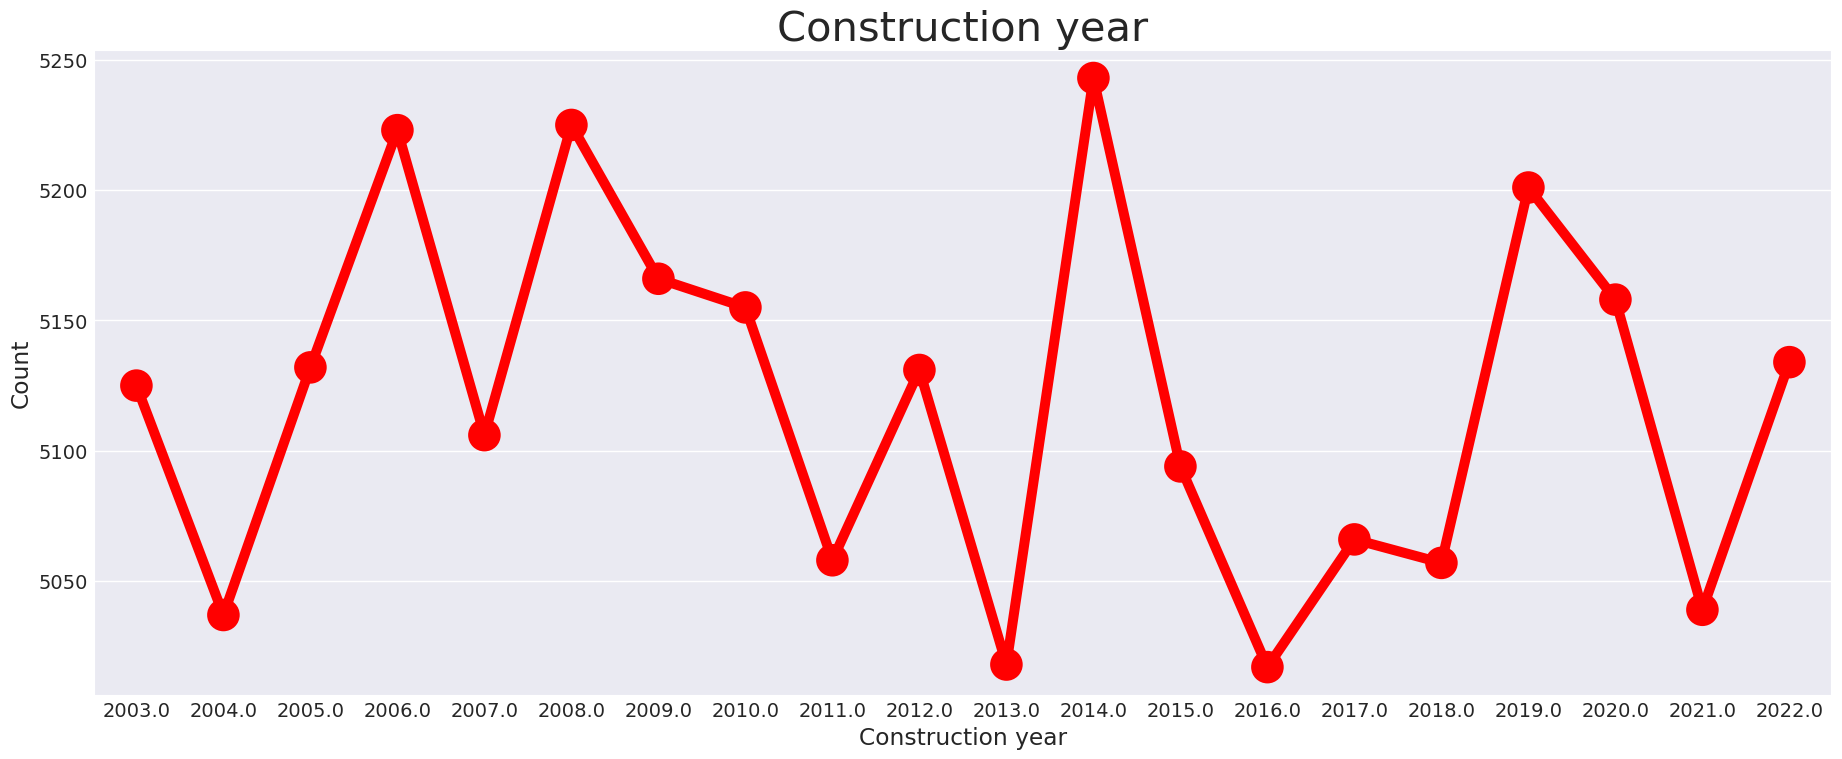

In [399]:
df1.shape
year=df1["Construction year"].value_counts()
plt.figure(figsize=(20,8))
sns.pointplot(x=year.index, y=year.values, color='red')
plt.xlabel("Construction year")
plt.ylabel("Count")
plt.title("Construction year", size=30)
plt.savefig('construction_year_count.png')
blob = bucket.blob('construction_year_count.png')
blob.upload_from_filename('construction_year_count.png')
plt.show()

In [400]:
df2 = sparkDF.select("price","service fee","room type")

In [401]:
df2 = df2.toPandas()

22/11/22 00:02:04 WARN TaskSetManager: Stage 108 contains a task of very large size (11085 KiB). The maximum recommended task size is 1000 KiB.


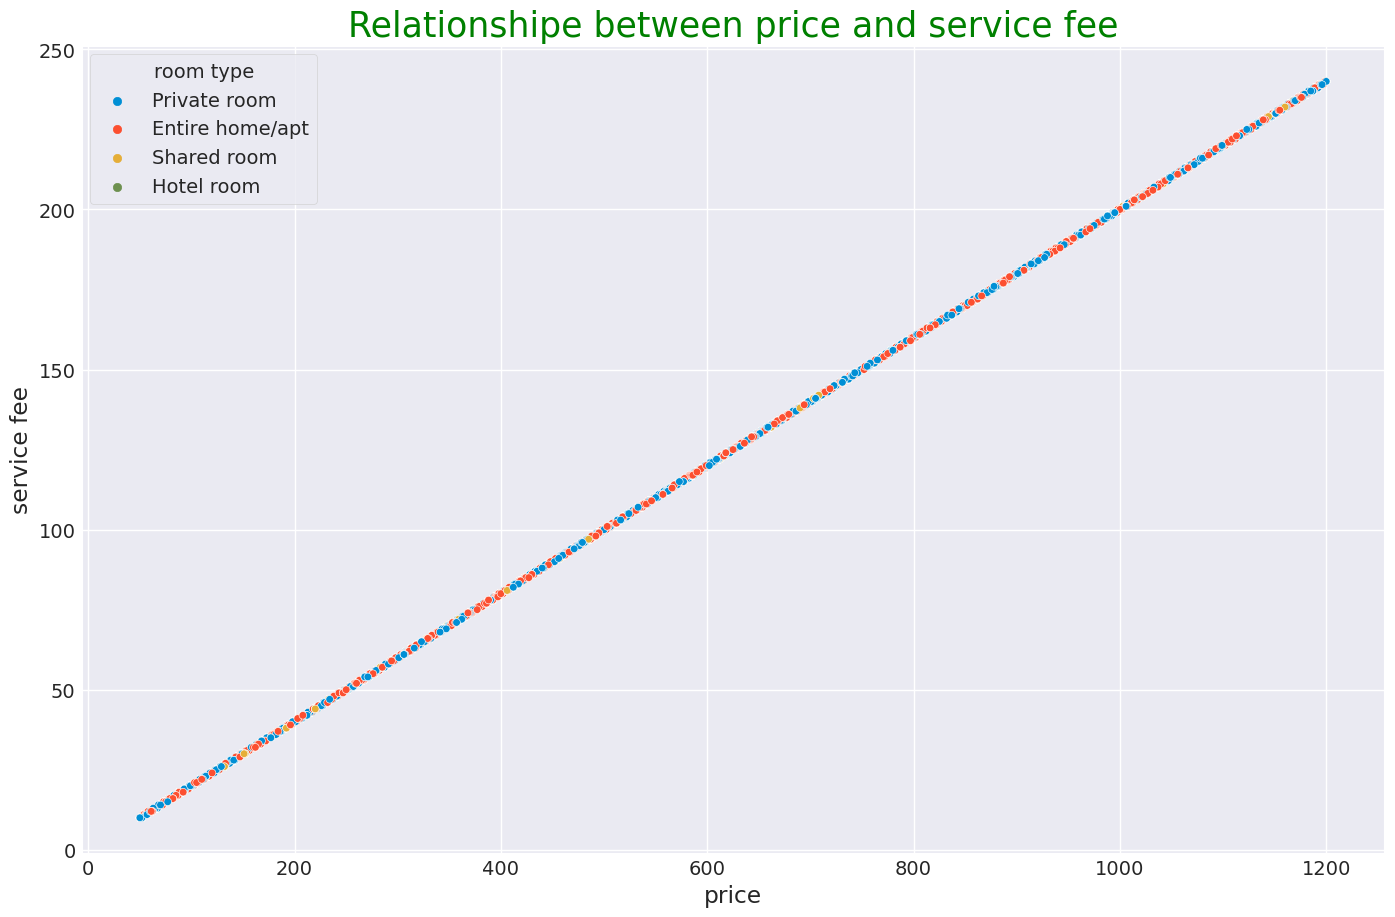

In [402]:
fig1 = plt.figure(figsize=(15,10))
plt.title("Relationshipe between price and service fee", size=25, color="green")
sns.scatterplot(x=df2['price'], y=df2['service fee'], hue=df2['room type'], s=30)
fig1.savefig('priceVSservicefees.png')
blob = bucket.blob('priceVSservicefees.png')
blob.upload_from_filename('priceVSservicefees.png')
fig1.show()

In [432]:
df3 = sparkDF.select("room type")

In [433]:
df3 = df3.toPandas()
px.histogram(df, x="room type", color="review rate number", barmode="group", title="Count of each review rate number")
plt.savefig('reviewrate.png')
blob = bucket.blob('reviewrate.png')
blob.upload_from_filename('reviewrate.png')
plt.show()

22/11/22 00:06:19 WARN TaskSetManager: Stage 129 contains a task of very large size (11085 KiB). The maximum recommended task size is 1000 KiB.


<Figure size 640x480 with 0 Axes>

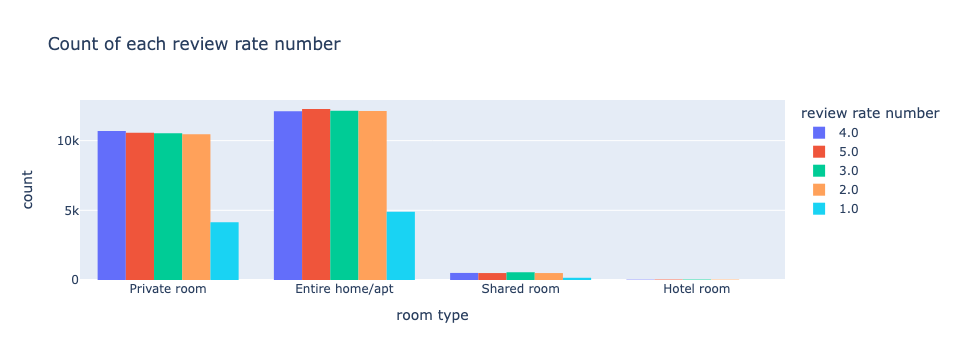

In [434]:
px.histogram(df, x="room type", color="review rate number", barmode="group", title="Count of each review rate number")

In [422]:
sparkDF.createOrReplaceTempView("top_20_listings")
query = "SELECT name , COUNT(name) AS ListingCount FROM top_20_listings GROUP BY 1 ORDER BY COUNT(name) DESC LIMIT 20"
top20listings = spark.sql(query)
top20listings.show()

22/11/22 00:04:52 WARN TaskSetManager: Stage 115 contains a task of very large size (11085 KiB). The maximum recommended task size is 1000 KiB.
+--------------------+------------+
|                name|ListingCount|
+--------------------+------------+
| Home away from home|          33|
|      Hillside Hotel|          30|
|Water View King B...|          30|
|New york Multi-un...|          27|
|  Brooklyn Apartment|          27|
|        Private Room|          23|
|              #NAME?|          20|
|Cozy Brooklyn Apa...|          20|
|Private room in B...|          19|
|IN MINT CONDITION...|          18|
|Cozy home away fr...|          18|
|Beautiful 2 Doubl...|          18|
|Beautiful King Be...|          18|
|        Private room|          17|
|Private room in W...|          16|
|          Harlem Gem|          16|
|Hotel Room King B...|          16|
|20-25 minutes to ...|          15|
|          Loft Suite|          15|
|A CLASSIC NYC NEI...|          14|
+--------------------+------

In [423]:
top20listings = top20listings.toPandas()

22/11/22 00:04:54 WARN TaskSetManager: Stage 119 contains a task of very large size (11085 KiB). The maximum recommended task size is 1000 KiB.


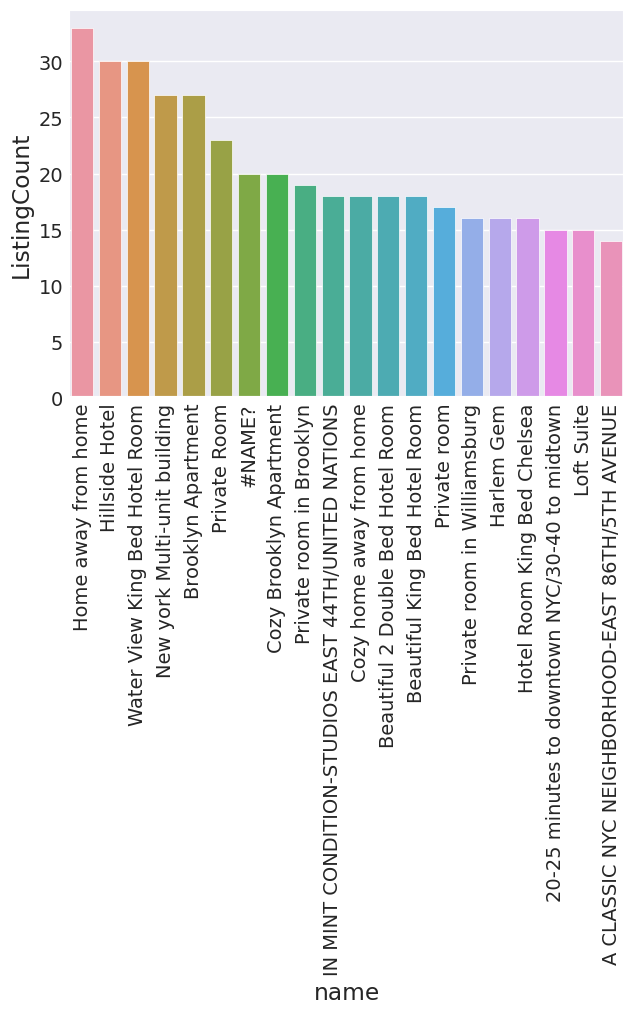

In [429]:
bar_plot = sns.barplot(top20listings, x= "name", y = "ListingCount")
for item in bar_plot.get_xticklabels():
    item.set_rotation(90)
plt.savefig('Top20Listings.png')
blob = bucket.blob('Top20Listings.png')
blob.upload_from_filename('Top20Listings.png')
plt.show()

In [425]:
sparkDF.createOrReplaceTempView("top_20_hosts")
query = "SELECT `host name` , COUNT(`host name`) AS HostCount FROM top_20_hosts GROUP BY 1 ORDER BY COUNT(`host name`) DESC LIMIT 20"
top20hosts = spark.sql(query)
top20hosts.show()

22/11/22 00:05:05 WARN TaskSetManager: Stage 123 contains a task of very large size (11085 KiB). The maximum recommended task size is 1000 KiB.
+------------+---------+
|   host name|HostCount|
+------------+---------+
|     Michael|      881|
|       David|      764|
|        John|      581|
|        Alex|      546|
|Sonder (NYC)|      516|
|      Daniel|      473|
|       Karen|      439|
|       Sarah|      434|
|       Maria|      426|
|        Anna|      400|
|      Andrew|      376|
|       Chris|      374|
|    Michelle|      370|
|     Jessica|      366|
|        Mike|      354|
|       Laura|      354|
|  Blueground|      312|
|       James|      309|
|         Amy|      303|
|     Melissa|      302|
+------------+---------+



In [426]:
top20hosts = top20hosts.toPandas()

22/11/22 00:05:06 WARN TaskSetManager: Stage 126 contains a task of very large size (11085 KiB). The maximum recommended task size is 1000 KiB.


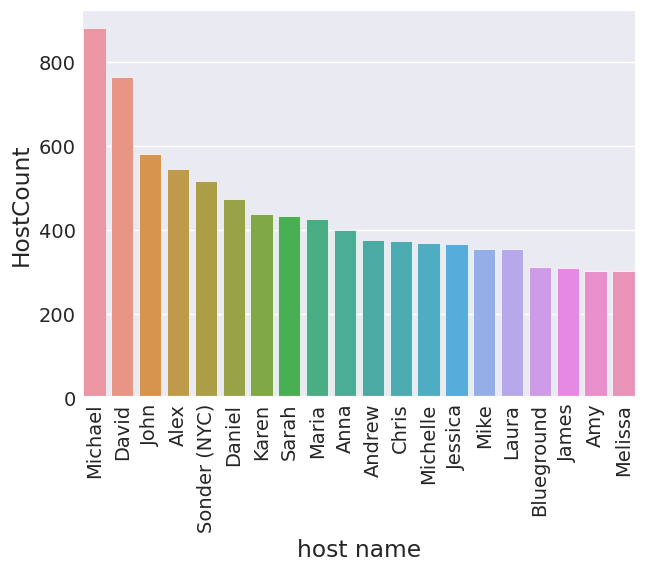

In [428]:
bar_plot = sns.barplot(top20hosts, x= "host name", y = "HostCount")
for item in bar_plot.get_xticklabels():
    item.set_rotation(90)
plt.savefig('Top20Listings.png')
blob = bucket.blob('Top20Listings.png')
blob.upload_from_filename('Top20Listings.png')
plt.show()